In [2]:
import pandas as pd
import numpy as np
import plotnine as p9
from scipy.stats import iqr

In [3]:
root_results_dir = "/projects/genomic-ml/da2343/ml_project_1/model_subsampling/results"

In [2]:
def test_error_graph(error_df):
    # Get unique values as list from column name `Dataset`
    dataset_list = error_df["Dataset"].unique().tolist()
    # colors = ["#000080", "#FF8000", "#800080", "#8B0000", "#D3D3D3"]
    colors = [ "orange", "red", "blue", "#053061", "#67001f"]
    
    
    
    for dataset in dataset_list:
        test_error_df_list = []
        # remove multi
        # Get new dataframe with only the dataset
        sub_dataset_df = error_df[error_df["Dataset"] == dataset]
        n_samples_list = sub_dataset_df["# of Total Samples"].unique().tolist()
        
        for n_sample in n_samples_list:
            filtered_csv = sub_dataset_df[sub_dataset_df["# of Total Samples"] == n_sample]
            algo_list = filtered_csv["Algorithm"].unique().tolist()
            
            for algorithm in algo_list:
                sub_filtered_csv = filtered_csv[filtered_csv["Algorithm"] == algorithm]
                # Get new dataframe with only the dataset and n_sample
                mean_mse = sub_filtered_csv['Mean Squared Error'].mean()
                std_mse = sub_filtered_csv['Mean Squared Error'].std() * 0.02
                # std_mse = sub_filtered_csv['Mean Squared Error'].std() * 0.01
                mse_min = mean_mse - std_mse
                mse_max = mean_mse + std_mse
                
                test_error_dict = {'# of Total Samples': n_sample,
                                'Mean Squared Error': mean_mse,
                                'ymin' : mse_min,
                                'ymax' : mse_max,
                                'Dataset': dataset,
                                'Algorithm': algorithm,
                                }
                test_error_df_list.append(pd.DataFrame(test_error_dict, index=[0]))
        my_combined_results_df = pd.concat(test_error_df_list).reset_index()
        
        gg = p9.ggplot(my_combined_results_df) +\
        p9.aes(x='# of Total Samples', y='Mean Squared Error', ymin="ymin", ymax= "ymax",  fill = "Algorithm") +\
        p9.facet_wrap('~Dataset') +\
        p9.geom_line( p9.aes(color = "Algorithm") ) +\
        p9.geom_ribbon(alpha = 0.3) +\
        p9.scale_x_continuous(breaks=n_samples_list) +\
        p9.scale_fill_manual(values=colors ) +\
        p9.scale_color_manual(values=colors) +\
        p9.xlab("# of Total Samples")
        # show the plot
        print(gg)
        # TODO: Uncomment to save the plot
        # gg.save(f"{dataset}_updated_graph.png", dpi=1500) 
        
        

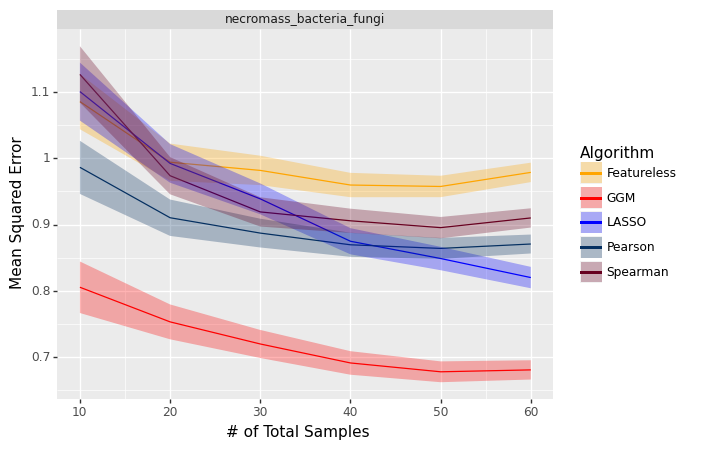

In [9]:
# date_time = "2023-03-06_17:34"
# date_time = "2023-03-22_17:46"
# date_time = "2023-03-22_18:45"
# date_time = "2023-03-22_19:15"
# date_time = "2023-04-03_18:15"
# date_time = "2023-04-03_18:31"
date_time = "2023-03-22_18:12"
date_time = "2023-03-22_19:01"
date_time = "2023-04-10_11:18"
date_time = "2023-04-10_12:28"

# date_time = "2023-04-10_17:47"
date_time = "2023-04-10_15:31"
date_time = "2023-05-29_12:40"
date_time = "2023-06-21_17:26"
date_time = "2023-06-21_19:01"
date_time = "2023-06-28_13:01"
# date_time = "2023-07-19_20:27"
date_time = "2023-07-20_16:36"

# NECROMASS DF
# date_time = "2023-07-20_16:44"
# date_time = "2023-08-03_18:13"
date_time = "2023-08-18_14:28"




error_df = pd.read_csv(f"{root_results_dir}/{date_time}_results.csv")
# error_df.loc[error_df['Algorithm'] == 'GuassianGraphicalMethod', 'Algorithm'] = 'GaussianGraphicalModel'

# error_df.to_csv(f"{root_results_dir}/{date_time}_results.csv", index=False)
# filter when `# of Total Samples` is 20, 40, 60, 80, 100
error_df = error_df[error_df["# of Total Samples"].isin([10, 20, 30, 40, 50, 60])]
test_error_graph(error_df)


In [10]:
necromass_custom_bact_fungi_error_df

,Mean Squared Error,FoldID,# of Total Samples,Index of Subsample,Dataset,Index of Predicted Column,Algorithm
0,1.036330,0,60,0,necromass_bacteria,367,Featureless
1,0.650796,0,60,0,necromass_bacteria,367,Spearman
2,0.539721,0,60,0,necromass_bacteria,367,Pearson
3,0.024559,0,60,0,necromass_bacteria,367,LASSO
4,0.052267,0,60,0,necromass_bacteria,367,GGM
...,...,...,...,...,...,...,...
102820,0.096042,2,40,0,necromass_fungi,0,Featureless
102821,0.096188,2,40,0,necromass_fungi,0,Spearman
102822,0.047135,2,40,0,necromass_fungi,0,Pearson
102823,0.096042,2,40,0,necromass_fungi,0,LASSO


In [14]:
sum1 = necromass_bact_error_df["Mean Squared Error"].mean()

sum2 = necromass_fungi_error_df["Mean Squared Error"].mean()

print(sum1)
print(sum2)
# Bact + Fungi = 371258.0915940405
# Bact_Fungi_Combined = 371742.5970010097

0.9353531764094595
0.9375595497799257


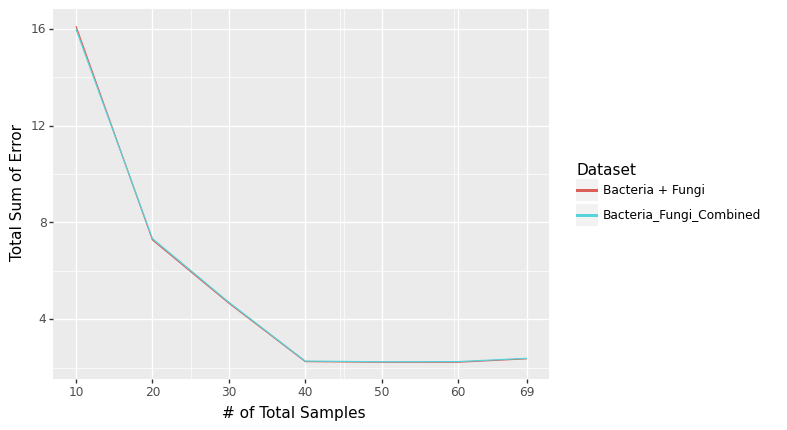

In [11]:
necromass_bact_error_df = pd.read_csv(
    f"{root_results_dir}/2023-07-20_16:44_results.csv"
)
necromass_fungi_error_df = pd.read_csv(
    f"{root_results_dir}/2023-08-03_18:13_results.csv"
)

necromass_custom_bact_fungi_error_df = pd.concat(
    [necromass_bact_error_df, necromass_fungi_error_df]
)
necromass_bact_fungi_error_df = pd.read_csv(
    f"{root_results_dir}/2023-08-18_14:28_results.csv"
)

test_error_df_list = []

n_samples_list = (
    necromass_custom_bact_fungi_error_df["# of Total Samples"].unique().tolist()
)
for n_sample in n_samples_list:
    filtered_necromass_custom_bact_fungi_error_df = (
        necromass_custom_bact_fungi_error_df[
            necromass_custom_bact_fungi_error_df["# of Total Samples"] == n_sample
        ]
    )
    filtered_necromass_bact_fungi_error_df = necromass_bact_fungi_error_df[
        necromass_bact_fungi_error_df["# of Total Samples"] == n_sample
    ]

    custom_bact_fungi_sum_mse = filtered_necromass_custom_bact_fungi_error_df[
        "Mean Squared Error"
    ].sum()
    bact_fungi_sum_mse = filtered_necromass_bact_fungi_error_df[
        "Mean Squared Error"
    ].sum()

    test_error_df_list.append(
        pd.DataFrame(
            {
                "# of Total Samples": n_sample,
                "Total Sum of Error": custom_bact_fungi_sum_mse,
                "Dataset": "Bacteria + Fungi",
            },
            index=[0],
        )
    )

    test_error_df_list.append(
        pd.DataFrame(
            {
                "# of Total Samples": n_sample,
                "Total Sum of Error": bact_fungi_sum_mse,
                "Dataset": "Bacteria_Fungi_Combined",
            },
            index=[0],
        )
    )

my_combined_results_df = pd.concat(test_error_df_list).reset_index()
# divide the Total Sum of Error	column by 1000
my_combined_results_df["Total Sum of Error"] = (
        my_combined_results_df["Total Sum of Error"] / 10000
        )

gg = (
    p9.ggplot(my_combined_results_df)
    + p9.aes(x="# of Total Samples", y="Total Sum of Error")
    + p9.geom_line(p9.aes(color="Dataset"))
    + p9.scale_x_continuous(breaks=n_samples_list)
    + p9.xlab("# of Total Samples")
)

print(gg)

In [5]:
my_combined_results_df

,index,# of Total Samples,Total Sum of Error,Dataset
0,0,60,22.276565,Bacteria + Fungi
1,0,60,22.532034,Bacteria_Fungi_Combined
2,0,30,46.644667,Bacteria + Fungi
3,0,30,47.033072,Bacteria_Fungi_Combined
4,0,10,161.036966,Bacteria + Fungi
5,0,10,159.746707,Bacteria_Fungi_Combined
6,0,40,22.534897,Bacteria + Fungi
7,0,40,22.746775,Bacteria_Fungi_Combined
8,0,20,72.781776,Bacteria + Fungi
9,0,20,73.354192,Bacteria_Fungi_Combined
